## Importing Utility Python Files

In [2]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2

from data import get_data, create_pairs
from enlarge_data import get_enlarge_data
from model import *
from train import train
from sklearn.metrics import accuracy_score
from print_stats import *
import numpy as np
from tensorflow.keras.utils import plot_model

2024-05-18 09:46:27.852158: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-18 09:46:27.897240: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-18 09:46:27.897270: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-18 09:46:27.897280: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-18 09:46:27.904427: I tensorflow/core/platform/cpu_feature_g

## Split Datasets

In [3]:
# Defining the size of the image after transformation
img_size = (100, 100)

# Split to get the training, testing, and validation datasets with 80:0:20 ratio.
# Random seed has been hard coded in data.py, set to "42"
data, train_indices, test_indices, val_indices = get_data(img_size=img_size, preprocessing='None')

n_true_pairs = 10
n_false_pairs = 40

train_pairs, train_labels = create_pairs(data, train_indices, n_true_pairs=n_true_pairs, n_false_pairs=n_false_pairs)
test_pairs, test_labels = create_pairs(data, test_indices, n_true_pairs=n_true_pairs, n_false_pairs=n_false_pairs)
val_pairs, val_labels = create_pairs(data, val_indices, n_true_pairs=n_true_pairs, n_false_pairs=n_false_pairs)

# Test Prints
print(f"{np.array(data).shape = }")
print(f"{train_pairs.shape = }, {train_labels.shape = }")
print(f"{test_pairs.shape = }, {test_labels.shape = }")
print(f"{val_pairs.shape = }, {val_labels.shape = }")

100%|██████████| 44/44 [01:30<00:00,  2.06s/it]


np.array(data).shape = (1453, 100, 100, 3)
train_pairs.shape = (57500, 2, 100, 100, 3), train_labels.shape = (57500,)
test_pairs.shape = (0,), test_labels.shape = (0,)
val_pairs.shape = (15150, 2, 100, 100, 3), val_labels.shape = (15150,)


## Experiment Model 1
Simple Model, lambda 0.03, Test with raw image (100,100,3)

### Train

In [4]:
history, model = train(
    train_pairs.shape[-3:],
    "Experiment 1",
    simple_model,
    train_pairs,
    train_labels,
    validation_data=([val_pairs[:, 0], val_pairs[:, 1]], val_labels),  # Pass validation_data as a keyword argument
    epochs=50
)

Epoch 1/50


2024-05-18 05:09:19.520865: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8903
2024-05-18 05:09:23.872013: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f62456824b0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-18 05:09:23.872047: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-05-18 05:09:23.907170: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-18 05:09:24.090484: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


450/450 [==============================] - ETA: 0s - loss: 2.6236 - binary_accuracy: 0.8091
Epoch 1: val_loss improved from inf to 0.63471, saving model to /root/PalmDetection/Weights/Experiment 1/weights.01-0.63.weights.h5
450/450 [==============================] - 52s 95ms/step - loss: 2.6236 - binary_accuracy: 0.8091 - val_loss: 0.6347 - val_binary_accuracy: 0.8238
Epoch 2/50
450/450 [==============================] - ETA: 0s - loss: 0.5781 - binary_accuracy: 0.8351
Epoch 2: val_loss improved from 0.63471 to 0.52011, saving model to /root/PalmDetection/Weights/Experiment 1/weights.02-0.52.weights.h5
450/450 [==============================] - 40s 89ms/step - loss: 0.5781 - binary_accuracy: 0.8351 - val_loss: 0.5201 - val_binary_accuracy: 0.8400
Epoch 3/50
450/450 [==============================] - ETA: 0s - loss: 0.5129 - binary_accuracy: 0.8481
Epoch 3: val_loss improved from 0.52011 to 0.51404, saving model to /root/PalmDetection/Weights/Experiment 1/weights.03-0.51.weights.h5
450/

### Plot Metrics and Architecture

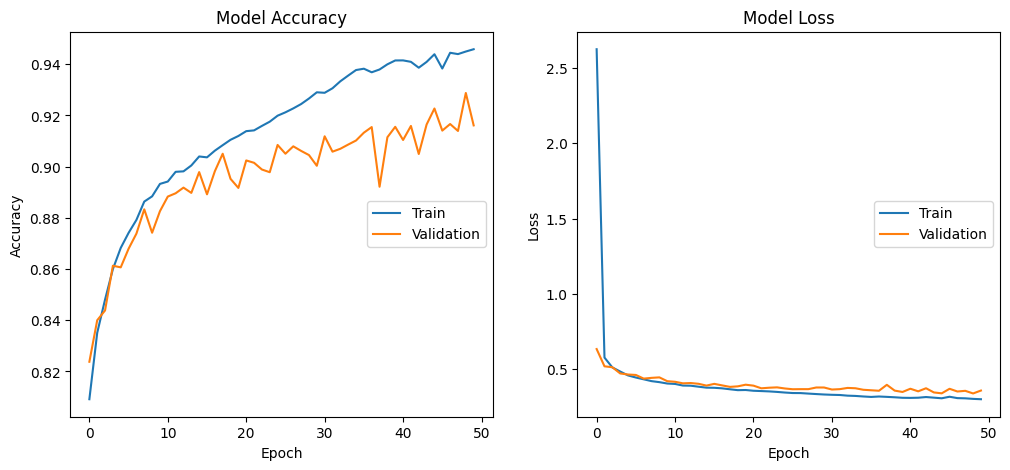

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 32)                   2401632   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 prediction_layer (Predicti  (None,)                      1         ['sequential[0][0]',      

In [5]:
plot_training_and_validation_accuracies(history)
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, show_layer_activations=True)

## Experiment Model 2
Big CNN Model, lambda 0.03, Test with raw image (100,100,3)

### Train

In [4]:
history, model = train(
    train_pairs.shape[-3:],
    "Experiment 2",
    big_cnn_model,
    train_pairs,
    train_labels,
    validation_data=([val_pairs[:, 0], val_pairs[:, 1]], val_labels),  # Pass validation_data as a keyword argument
    epochs=50
)

Epoch 1/50


2024-05-18 06:50:00.003166: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8903
2024-05-18 06:50:06.737428: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f91249116c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-18 06:50:06.737459: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-05-18 06:50:06.788280: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-18 06:50:06.979482: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


450/450 [==============================] - ETA: 0s - loss: 2.9192 - binary_accuracy: 0.7975
Epoch 1: val_loss improved from inf to 0.64101, saving model to /root/PalmDetection/Weights/Experiment 2/weights.01-0.64.weights.h5
450/450 [==============================] - 143s 284ms/step - loss: 2.9192 - binary_accuracy: 0.7975 - val_loss: 0.6410 - val_binary_accuracy: 0.8363
Epoch 2/50
450/450 [==============================] - ETA: 0s - loss: 0.6311 - binary_accuracy: 0.8217
Epoch 2: val_loss improved from 0.64101 to 0.56096, saving model to /root/PalmDetection/Weights/Experiment 2/weights.02-0.56.weights.h5
450/450 [==============================] - 121s 268ms/step - loss: 0.6311 - binary_accuracy: 0.8217 - val_loss: 0.5610 - val_binary_accuracy: 0.8341
Epoch 3/50
450/450 [==============================] - ETA: 0s - loss: 0.5682 - binary_accuracy: 0.8350
Epoch 3: val_loss improved from 0.56096 to 0.54064, saving model to /root/PalmDetection/Weights/Experiment 2/weights.03-0.54.weights.h5


### Plot Metrics and Architecture

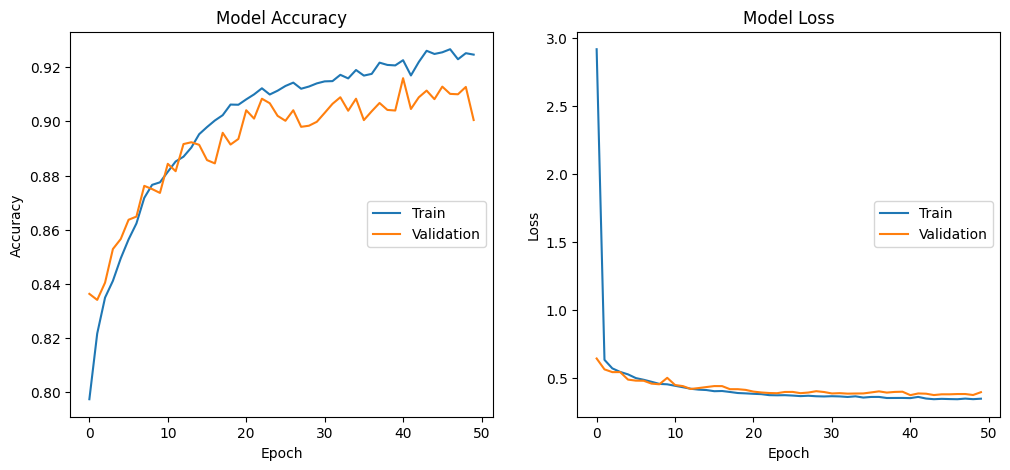

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 32)                   3821792   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 prediction_layer (Predicti  (None,)                      1         ['sequential_2[0][0]',    

In [5]:
plot_training_and_validation_accuracies(history)
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, show_layer_activations=True)

## Experiment Model 3
Alexnet Model, Test with raw image (100,100,3)

### Train

In [4]:
history, model = train(
    train_pairs.shape[-3:],
    "Experiment 3",
    alexnet_model,
    train_pairs,
    train_labels,
    validation_data=([val_pairs[:, 0], val_pairs[:, 1]], val_labels),  # Pass validation_data as a keyword argument
    epochs=100
)

Epoch 1/100


2024-05-18 09:48:16.687759: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8903
2024-05-18 09:48:20.593806: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f3c9eba71d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-18 09:48:20.593839: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-05-18 09:48:20.627612: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-18 09:48:20.802473: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


450/450 [==============================] - ETA: 0s - loss: 3.9758 - binary_accuracy: 0.7575
Epoch 1: val_loss improved from inf to 1.58984, saving model to /root/PalmDetection/Weights/Experiment 3/weights.01-1.59.weights.h5
450/450 [==============================] - 39s 68ms/step - loss: 3.9758 - binary_accuracy: 0.7575 - val_loss: 1.5898 - val_binary_accuracy: 0.4514
Epoch 2/100
450/450 [==============================] - ETA: 0s - loss: 0.6674 - binary_accuracy: 0.7485
Epoch 2: val_loss improved from 1.58984 to 1.44776, saving model to /root/PalmDetection/Weights/Experiment 3/weights.02-1.45.weights.h5
450/450 [==============================] - 25s 55ms/step - loss: 0.6674 - binary_accuracy: 0.7485 - val_loss: 1.4478 - val_binary_accuracy: 0.4886
Epoch 3/100
449/450 [============================>.] - ETA: 0s - loss: 0.6137 - binary_accuracy: 0.7572
Epoch 3: val_loss improved from 1.44776 to 1.34493, saving model to /root/PalmDetection/Weights/Experiment 3/weights.03-1.34.weights.h5
45

### Plot Metrics and Architecture

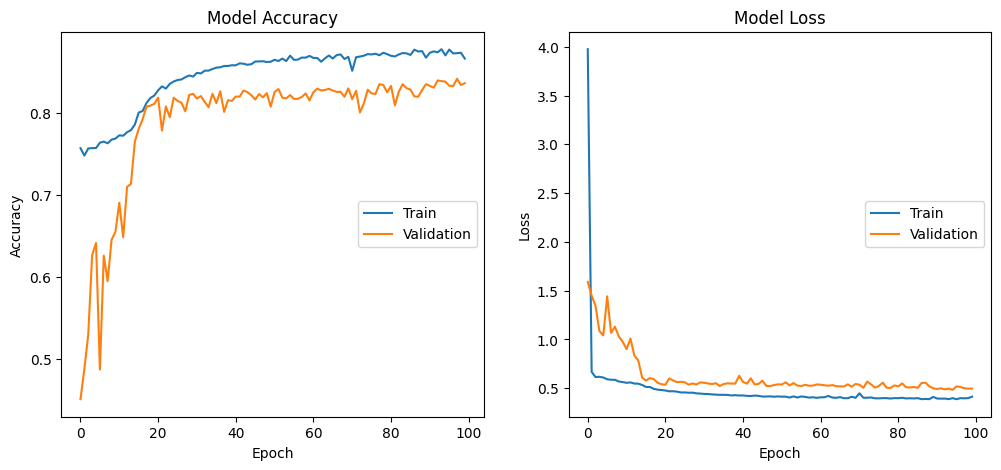

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 sequential_1 (Sequential)   (None, 32)                   4046368   ['input_1[0][0]',             
                                                                     'input_2[0][0]']             
                                                                                                  
 prediction_layer (Predicti  (None,)                      1         ['sequential_1[0][0]',    

In [5]:
plot_training_and_validation_accuracies(history)
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True, expand_nested=True, show_layer_activations=True)